In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

# Generate some random sample data (1d) 

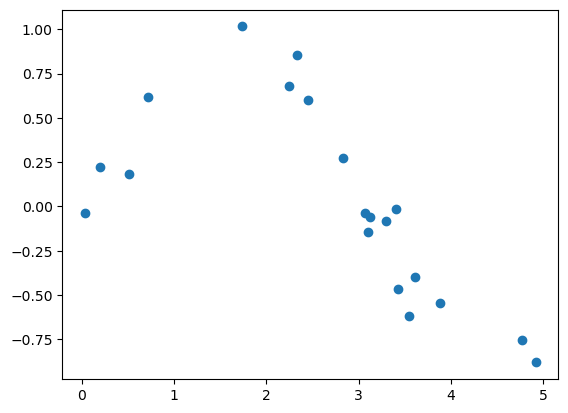

In [2]:
# Generate some noisy data for regression
# np.random.seed(0)
X = np.sort(5 * np.random.rand(20, 1), axis=0)  # 100 data points between 0 and 5
y = np.sin(X).ravel() + 0.2 * np.random.randn(20)  # Sinusoidal data with noise
plt.scatter(X, y);

# Define kernel function

In [3]:
kernel = C(0.01) * RBF(1) + WhiteKernel(noise_level=10)
# the kernel contains following hyperparameters
# C: signal variance
# RBF: the squared exponential with length-scale as the hyperparameter
# WhiteKernel: the correct of the noise with noise variance as the hyperparmeter

# Create and Fit the GaussianProcessRegressor

In [4]:
# Create the GaussianProcessRegressor model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model to the noisy data
gp.fit(X, y)

GaussianProcessRegressor(kernel=0.1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=10),
                         n_restarts_optimizer=10)

# Make Predictions

In [5]:
# Create test points where you want to predict
X_test = np.linspace(0, 5, 1000).reshape(-1, 1)

# Predict the mean and standard deviation at the test points
y_pred, sigma = gp.predict(X_test, return_std=True)

# Visualize result

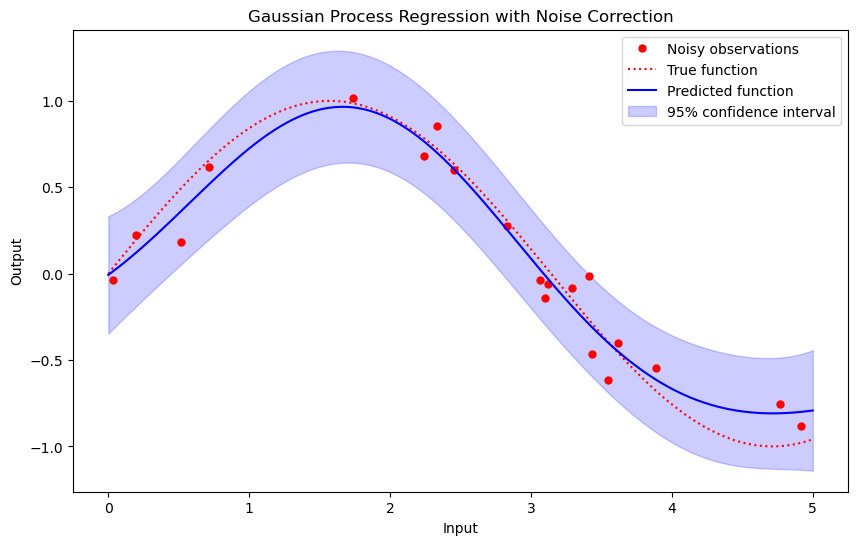

In [6]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label='Noisy observations')
plt.plot(X_test, np.sin(X_test), 'r:', label='True function')
plt.plot(X_test, y_pred, 'b-', label='Predicted function')
plt.fill_between(X_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='blue', alpha=0.2, label='95% confidence interval')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Gaussian Process Regression with Noise Correction')
plt.legend()
plt.show()